In [1]:
# NOTE: This does NOT have points close to real ones removed!

import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import sklearn

crime = pd.read_csv('E:/Vancouver Crime Final/Synthetic Data/residential_bne_100k_combined.csv')

crime.head(20)

,type,datetime,year,month,day,hour,minute,Hour_Minute,hundred_block,utm_x,...,signal_200,trees_25,trees_100,rain_mm,snow_cm,total_precip_mm,temp_c,humidity,pressure,hours_of_light
0,Break and Enter Residential/Other,2003-01-01 00:00:00,2003,1,1,0,0,0.000000,9XX W 15TH AVE,490791.12,...,2,0,32,21.6,0.0,21.6,5.8,81.0,101.70,9.53
1,Break and Enter Residential/Other,2003-01-01 00:00:00,2003,1,1,0,1,0.016667,34XX W 42ND AVE,486837.11,...,3,6,38,21.6,0.0,21.6,5.8,81.0,101.70,9.53
2,Break and Enter Residential/Other,2003-01-01 00:00:00,2003,1,1,0,20,0.333333,19XX PARKER ST,495279.46,...,1,8,88,21.6,0.0,21.6,5.8,81.0,101.70,9.53
3,Break and Enter Residential/Other,2003-01-01 01:01:00,2003,1,1,1,46,1.766667,45XX MAIN ST,492627.84,...,2,8,83,21.6,0.0,21.6,6.2,78.0,101.73,9.53
4,Break and Enter Residential/Other,2003-01-01 04:04:00,2003,1,1,4,0,4.000000,25XX GRAVELEY ST,496100.23,...,0,7,73,21.6,0.0,21.6,5.5,88.0,101.70,9.53
5,Break and Enter Residential/Other,2003-01-01 04:04:00,2003,1,1,4,30,4.500000,15XX SE MARINE DR,494572.37,...,1,0,41,21.6,0.0,21.6,5.5,88.0,101.70,9.53
6,Break and Enter Residential/Other,2003-01-01 07:07:00,2003,1,1,7,25,7.416667,7XX SEMLIN DR,495363.36,...,1,1,61,21.6,0.0,21.6,5.8,95.0,101.50,9.53
7,Break and Enter Residential/Other,2003-01-01 11:11:00,2003,1,1,11,0,11.000000,22XX TRIUMPH ST,495716.74,...,4,6,67,21.6,0.0,21.6,6.0,95.0,101.33,9.53
8,Break and Enter Residential/Other,2003-01-01 11:11:00,2003,1,1,11,45,11.750000,38XX HEATHER ST,491248.44,...,1,8,93,21.6,0.0,21.6,6.0,95.0,101.33,9.53
9,Break and Enter Residential/Other,2003-01-01 12:12:00,2003,1,1,12,0,12.000000,41XX VINE ST,488613.83,...,0,0,4,21.6,0.0,21.6,5.7,95.0,101.35,9.53


In [2]:
# Set Break and ENters to 1 and everything else to 0

crime = crime.replace(['NONE'], 0)

crime = crime.replace(['Break and Enter Residential/Other', 'Break and Enter Commercial'], 1)
crime.head()

,type,datetime,year,month,day,hour,minute,Hour_Minute,hundred_block,utm_x,...,signal_200,trees_25,trees_100,rain_mm,snow_cm,total_precip_mm,temp_c,humidity,pressure,hours_of_light
0,1,2003-01-01 00:00:00,2003,1,1,0,0,0.000000,9XX W 15TH AVE,490791.12,...,2,0,32,21.6,0.0,21.6,5.8,81.0,101.70,9.53
1,1,2003-01-01 00:00:00,2003,1,1,0,1,0.016667,34XX W 42ND AVE,486837.11,...,3,6,38,21.6,0.0,21.6,5.8,81.0,101.70,9.53
2,1,2003-01-01 00:00:00,2003,1,1,0,20,0.333333,19XX PARKER ST,495279.46,...,1,8,88,21.6,0.0,21.6,5.8,81.0,101.70,9.53
3,1,2003-01-01 01:01:00,2003,1,1,1,46,1.766667,45XX MAIN ST,492627.84,...,2,8,83,21.6,0.0,21.6,6.2,78.0,101.73,9.53
4,1,2003-01-01 04:04:00,2003,1,1,4,0,4.000000,25XX GRAVELEY ST,496100.23,...,0,7,73,21.6,0.0,21.6,5.5,88.0,101.70,9.53


In [3]:
crime

,type,datetime,year,month,day,hour,minute,Hour_Minute,hundred_block,utm_x,...,signal_200,trees_25,trees_100,rain_mm,snow_cm,total_precip_mm,temp_c,humidity,pressure,hours_of_light
0,1,2003-01-01 00:00:00,2003,1,1,0,0,0.000000,9XX W 15TH AVE,490791.120000,...,2,0,32,21.6,0.0,21.6,5.8,81.0,101.70,9.53
1,1,2003-01-01 00:00:00,2003,1,1,0,1,0.016667,34XX W 42ND AVE,486837.110000,...,3,6,38,21.6,0.0,21.6,5.8,81.0,101.70,9.53
2,1,2003-01-01 00:00:00,2003,1,1,0,20,0.333333,19XX PARKER ST,495279.460000,...,1,8,88,21.6,0.0,21.6,5.8,81.0,101.70,9.53
3,1,2003-01-01 01:01:00,2003,1,1,1,46,1.766667,45XX MAIN ST,492627.840000,...,2,8,83,21.6,0.0,21.6,6.2,78.0,101.73,9.53
4,1,2003-01-01 04:04:00,2003,1,1,4,0,4.000000,25XX GRAVELEY ST,496100.230000,...,0,7,73,21.6,0.0,21.6,5.5,88.0,101.70,9.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165797,0,2018-02-07 12:46:00,2018,2,7,12,46,12.766667,9XX E 27TH AVE,493764.962443,...,0,11,64,2.0,0.0,2.0,8.7,95.0,102.79,10.87
165798,0,2004-12-31 00:20:00,2004,12,31,0,20,0.333333,ODLUM DR / WILLIAM ST,494477.870000,...,1,7,46,2.0,0.0,2.0,3.5,92.0,100.42,9.52
165799,0,2008-08-27 01:35:00,2008,8,27,1,35,1.583333,9XX E 62ND AV,493674.480000,...,0,7,74,4.2,0.0,4.2,11.3,92.0,101.00,14.82
165800,0,2018-02-14 22:55:00,2018,2,14,22,55,22.916667,E 29TH AVE / QUEBEC ST,492535.810000,...,3,10,67,6.2,0.0,6.2,1.9,93.0,102.27,11.24


In [4]:
### Begin Processing the Data


# Import Pre-processing module
from sklearn import preprocessing

# Create Label Encoder
le = preprocessing.LabelEncoder()

# Convert the string columns to numeric
# .astype(str) to ensude they are read as strings and not as mixed types
crime['datetime'] = le.fit_transform(crime['datetime'].astype(str))
crime['hundred_block'] = le.fit_transform(crime['hundred_block'].astype(str))


# Display the results
crime

,type,datetime,year,month,day,hour,minute,Hour_Minute,hundred_block,utm_x,...,signal_200,trees_25,trees_100,rain_mm,snow_cm,total_precip_mm,temp_c,humidity,pressure,hours_of_light
0,1,0,2003,1,1,0,0,0.000000,14745,490791.120000,...,2,0,32,21.6,0.0,21.6,5.8,81.0,101.70,9.53
1,1,0,2003,1,1,0,1,0.016667,7242,486837.110000,...,3,6,38,21.6,0.0,21.6,5.8,81.0,101.70,9.53
2,1,0,2003,1,1,0,20,0.333333,2673,495279.460000,...,1,8,88,21.6,0.0,21.6,5.8,81.0,101.70,9.53
3,1,2,2003,1,1,1,46,1.766667,9149,492627.840000,...,2,8,83,21.6,0.0,21.6,6.2,78.0,101.73,9.53
4,1,5,2003,1,1,4,0,4.000000,4647,496100.230000,...,0,7,73,21.6,0.0,21.6,5.5,88.0,101.70,9.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165797,0,135976,2018,2,7,12,46,12.766667,14638,493764.962443,...,0,11,64,2.0,0.0,2.0,8.7,95.0,102.79,10.87
165798,0,20668,2004,12,31,0,20,0.333333,19632,494477.870000,...,1,7,46,2.0,0.0,2.0,3.5,92.0,100.42,9.52
165799,0,55878,2008,8,27,1,35,1.583333,14664,493674.480000,...,0,7,74,4.2,0.0,4.2,11.3,92.0,101.00,14.82
165800,0,136145,2018,2,14,22,55,22.916667,16925,492535.810000,...,3,10,67,6.2,0.0,6.2,1.9,93.0,102.27,11.24


In [5]:
# Scale the Data

columns = [col for col in crime if col not in ['type']]


# Properly scale the reduced set of features
features = crime[columns]

from sklearn.preprocessing import MinMaxScaler
scaler = preprocessing.MinMaxScaler()

print(scaler.fit(features))

MinMaxScaler(copy=True, feature_range=(0, 1))


In [6]:
# Properly scale the features

columns = [col for col in crime if col not in ['type']]

# Properly scale the reduced set of features
features = crime[columns]


scaler = MinMaxScaler().fit(features.values) # scaler = MinMaxScaler().fit(features.values)
features = scaler.transform(features.values) # features = scaler.transform(features.values)
crime[columns] = features
crime

,type,datetime,year,month,day,hour,minute,Hour_Minute,hundred_block,utm_x,...,signal_200,trees_25,trees_100,rain_mm,snow_cm,total_precip_mm,temp_c,humidity,pressure,hours_of_light
0,1,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.674921,0.485368,...,0.142857,0.00000,0.244275,0.235808,0.0,0.235808,0.408421,0.781609,0.609459,0.010909
1,1,0.000000,0.0000,0.000000,0.000000,0.000000,0.016949,0.000695,0.331487,0.214540,...,0.214286,0.18750,0.290076,0.235808,0.0,0.235808,0.408421,0.781609,0.609459,0.010909
2,1,0.000000,0.0000,0.000000,0.000000,0.000000,0.338983,0.013899,0.122351,0.792795,...,0.071429,0.25000,0.671756,0.235808,0.0,0.235808,0.408421,0.781609,0.609459,0.010909
3,1,0.000013,0.0000,0.000000,0.000000,0.043478,0.779661,0.073662,0.418776,0.611173,...,0.142857,0.25000,0.633588,0.235808,0.0,0.235808,0.416842,0.747126,0.613514,0.010909
4,1,0.000034,0.0000,0.000000,0.000000,0.173913,0.000000,0.166782,0.212707,0.849013,...,0.000000,0.21875,0.557252,0.235808,0.0,0.235808,0.402105,0.862069,0.609459,0.010909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165797,0,0.916997,0.9375,0.090909,0.200000,0.521739,0.779661,0.532314,0.670023,0.689060,...,0.000000,0.34375,0.488550,0.021834,0.0,0.021834,0.469474,0.942529,0.756757,0.173333
165798,0,0.139381,0.0625,1.000000,1.000000,0.000000,0.338983,0.013899,0.898613,0.737890,...,0.071429,0.21875,0.351145,0.021834,0.0,0.021834,0.360000,0.908046,0.436486,0.009697
165799,0,0.376831,0.3125,0.636364,0.866667,0.043478,0.593220,0.066018,0.671213,0.682862,...,0.000000,0.21875,0.564885,0.045852,0.0,0.045852,0.524211,0.908046,0.514865,0.652121
165800,0,0.918137,0.9375,0.090909,0.433333,0.956522,0.932203,0.955525,0.774706,0.604870,...,0.214286,0.31250,0.511450,0.067686,0.0,0.067686,0.326316,0.919540,0.686486,0.218182


In [7]:
# split training data into training and testing
from sklearn.model_selection import train_test_split

# Select columns to that are data
cols = [col for col in crime if col not in ['type', 'minute', 'Hour_Minute', 'latitude', 'longitude', 'datetime']]

X = crime[cols]

# Select target data
y = crime['type']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100, test_size=0.3)
print(X_train.shape)

(116061, 24)


In [8]:
X_train

,year,month,day,hour,hundred_block,utm_x,utm_y,light_pole_12_5,light_pole_25,light_pole_50,...,signal_200,trees_25,trees_100,rain_mm,snow_cm,total_precip_mm,temp_c,humidity,pressure,hours_of_light
70316,0.5625,0.818182,0.033333,0.260870,0.425550,0.047699,0.520506,0.000000,0.014925,0.025641,...,0.071429,0.28125,0.343511,0.000000,0.000000,0.000000,0.501053,0.689655,0.654054,0.384242
11727,0.0625,0.818182,0.066667,0.782609,0.025862,0.460223,0.228466,0.035714,0.014925,0.064103,...,0.000000,0.15625,0.511450,0.000000,0.000000,0.000000,0.606316,0.632184,0.636486,0.378182
6169,0.0000,0.909091,0.766667,0.434783,0.014922,0.482503,0.733887,0.035714,0.044776,0.153846,...,0.357143,0.18750,0.396947,0.048035,0.000000,0.048035,0.393684,0.701149,0.575676,0.061818
103336,0.3750,0.909091,0.066667,0.173913,0.916968,0.947287,0.456247,0.035714,0.029851,0.102564,...,0.071429,0.25000,0.557252,0.000000,0.000000,0.000000,0.393684,0.873563,0.770270,0.169697
9092,0.0625,0.363636,0.000000,0.391304,0.256053,0.898446,0.551214,0.035714,0.029851,0.089744,...,0.071429,0.12500,0.259542,0.000000,0.000000,0.000000,0.694737,0.448276,0.640541,0.779394
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82270,0.3125,0.000000,0.233333,0.130435,0.435712,0.135300,0.368855,0.035714,0.014925,0.038462,...,0.000000,0.09375,0.183206,0.074236,0.156716,0.120087,0.294737,0.919540,0.425676,0.026667
65615,1.0000,0.636364,0.100000,0.869565,0.615416,0.675294,0.514778,0.035714,0.014925,0.102564,...,0.142857,0.21875,0.442748,0.000000,0.000000,0.000000,0.703158,0.758621,0.567568,0.823030
77655,0.2500,0.545455,0.900000,0.304348,0.851833,0.717762,0.265493,0.035714,0.014925,0.076923,...,0.000000,0.25000,0.488550,0.000000,0.000000,0.000000,0.646316,0.724138,0.586486,0.869091
56088,0.7500,0.909091,0.533333,0.000000,0.112418,0.382030,0.542361,0.035714,0.014925,0.025641,...,0.214286,0.15625,0.366412,0.063319,0.000000,0.063319,0.404211,0.931034,0.491892,0.094545


In [9]:
# Trying Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

model_tree = RandomForestClassifier(random_state=100, n_estimators=50)
model_tree.fit(X_train, y_train)
print(model_tree.feature_importances_)
sel_model_tree = SelectFromModel(estimator=model_tree, prefit=True, threshold='mean')  
      # since we already fit the data, we specify prefit option here
      # Features whose importance is greater or equal to the threshold are kept while the others are discarded.
X_train_sfm_tree = sel_model_tree.transform(X_train)
print(sel_model_tree.get_support())

feature_importances = pd.DataFrame(model_tree.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', 
                                                                        ascending=False)
feature_importances

[0.05228293 0.0243195  0.04010859 0.05547901 0.19220692 0.07140068
 0.07147274 0.01590855 0.02474553 0.03518535 0.04709379 0.00679328
 0.00341006 0.00868264 0.02213364 0.0365606  0.05646707 0.02265636
 0.00182596 0.02308092 0.04794582 0.04313352 0.04965494 0.04745161]
[ True False False  True  True  True  True False False False  True False
 False False False False  True False False False  True  True  True  True]


,importance
hundred_block,0.192207
utm_y,0.071473
utm_x,0.071401
trees_100,0.056467
hour,0.055479
year,0.052283
pressure,0.049655
temp_c,0.047946
hours_of_light,0.047452
light_pole_100,0.047094


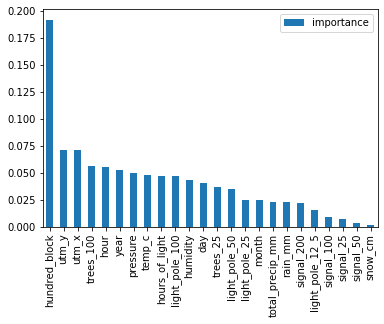

In [10]:
feature_importances.plot.bar()

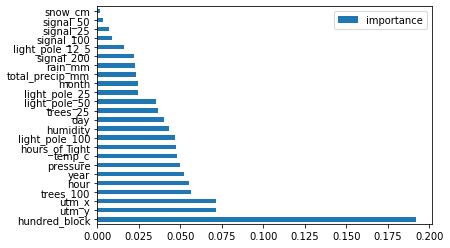

In [11]:
feature_importances.plot.barh()

In [12]:
# Simple Neural Network

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor

# import needed modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

In [13]:
# Try using the MLP Classifier
mlp = MLPClassifier(hidden_layer_sizes=(24, 24, 24), activation='relu', solver='adam', max_iter=300)
mlp.fit(X_train, y_train)

predict_train = mlp.predict(X_train)
predict_test = mlp.predict(X_test)

In [14]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_train, predict_train))
print(classification_report(y_train, predict_train))

[[56720 13362]
 [17587 28392]]
              precision    recall  f1-score   support

           0       0.76      0.81      0.79     70082
           1       0.68      0.62      0.65     45979

    accuracy                           0.73    116061
   macro avg       0.72      0.71      0.72    116061
weighted avg       0.73      0.73      0.73    116061



In [15]:
print(confusion_matrix(y_test, predict_test))
print(classification_report(y_test, predict_test))

[[24029  5911]
 [ 8063 11738]]
              precision    recall  f1-score   support

           0       0.75      0.80      0.77     29940
           1       0.67      0.59      0.63     19801

    accuracy                           0.72     49741
   macro avg       0.71      0.70      0.70     49741
weighted avg       0.72      0.72      0.72     49741



In [ ]:
# Try using the MLP Classifier
mlp = MLPClassifier(hidden_layer_sizes=(29, 29, 29), activation='relu', solver='adam', max_iter=300)
mlp.fit(X_train, y_train)

predict_train = mlp.predict(X_train)
predict_test = mlp.predict(X_test)

In [ ]:
print(confusion_matrix(y_train, predict_train))
print(classification_report(y_train, predict_train))

In [ ]:
print(confusion_matrix(y_test, predict_test))
print(classification_report(y_test, predict_test))

In [ ]:
############################# END HERE ###################################

In [ ]:
# Try using the MLP Classifier
mlp = MLPClassifier(hidden_layer_sizes=(29, 29, 29, 29, 29, 29, 29), activation='relu', solver='adam', max_iter=200)
mlp.fit(X_train, y_train)

predict_train = mlp.predict(X_train)
predict_test = mlp.predict(X_test)

In [ ]:
print(confusion_matrix(y_train, predict_train))
print(classification_report(y_train, predict_train))

In [ ]:
print(confusion_matrix(y_test, predict_test))
print(classification_report(y_test, predict_test))

In [ ]:
feature_importances

In [ ]:
# Cut down features

# split training data into training and testing
from sklearn.model_selection import train_test_split

# Select columns to that are data
cols = [col for col in crime if col not in ['type', 'minute', 'hour', 'latitude', 'longitude', 'datetime']]

X = crime[cols]

# Select target data
y = crime['type']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100, test_size=0.3)
print(X_train.shape)

In [ ]:
X_train

In [ ]:
y_train

In [ ]:
# Trying Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

model_tree = RandomForestClassifier(random_state=100, n_estimators=50)
model_tree.fit(X_train, y_train)
print(model_tree.feature_importances_)
sel_model_tree = SelectFromModel(estimator=model_tree, prefit=True, threshold='mean')  
      # since we already fit the data, we specify prefit option here
      # Features whose importance is greater or equal to the threshold are kept while the others are discarded.
X_train_sfm_tree = sel_model_tree.transform(X_train)
print(sel_model_tree.get_support())

feature_importances = pd.DataFrame(model_tree.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', 
                                                                        ascending=False)
feature_importances

In [ ]:
# Try using the MLP Classifier
mlp = MLPClassifier(hidden_layer_sizes=(24, 24, 24), activation='relu', solver='adam', max_iter=300)
mlp.fit(X_train, y_train)

predict_train = mlp.predict(X_train)
predict_test = mlp.predict(X_test)

In [ ]:
print(confusion_matrix(y_train, predict_train))
print(classification_report(y_train, predict_train))

In [ ]:
print(confusion_matrix(y_test, predict_test))
print(classification_report(y_test, predict_test))

In [ ]:
# Try using the MLP Classifier
mlp = MLPClassifier(hidden_layer_sizes=(29, 29, 29, 29, 29, 29, 29), activation='relu', solver='adam', max_iter=300)
mlp.fit(X_train, y_train)

predict_train = mlp.predict(X_train)
predict_test = mlp.predict(X_test)

In [ ]:
print(confusion_matrix(y_train, predict_train))
print(classification_report(y_train, predict_train))

In [ ]:
print(confusion_matrix(y_test, predict_test))
print(classification_report(y_test, predict_test))

In [ ]:
# Cut down features again

# split training data into training and testing
from sklearn.model_selection import train_test_split

# Select columns to that are data
cols = [col for col in crime if col not in ['type', 'minute', 'hour', 'latitude', 'longitude', 'datetime', 
                                            'snow_cm', 'rain_mm', 'signal_25', 'signal_50', 'signal_100', 
                                            'light_pole_12_5']]

X = crime[cols]

# Select target data
y = crime['type']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100, test_size=0.3)
print(X_train.shape)

In [ ]:
# Trying Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

model_tree = RandomForestClassifier(random_state=100, n_estimators=50)
model_tree.fit(X_train, y_train)
print(model_tree.feature_importances_)
sel_model_tree = SelectFromModel(estimator=model_tree, prefit=True, threshold='mean')  
      # since we already fit the data, we specify prefit option here
      # Features whose importance is greater or equal to the threshold are kept while the others are discarded.
X_train_sfm_tree = sel_model_tree.transform(X_train)
print(sel_model_tree.get_support())

feature_importances = pd.DataFrame(model_tree.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', 
                                                                        ascending=False)
feature_importances

In [ ]:
# Try using the MLP Classifier
mlp = MLPClassifier(hidden_layer_sizes=(18, 18, 18), activation='relu', solver='adam', max_iter=300)
mlp.fit(X_train, y_train)

predict_train = mlp.predict(X_train)
predict_test = mlp.predict(X_test)

In [ ]:
print(confusion_matrix(y_train, predict_train))
print(classification_report(y_train, predict_train))

In [ ]:
print(confusion_matrix(y_test, predict_test))
print(classification_report(y_test, predict_test))

In [ ]:
# Try using the MLP Classifier
mlp = MLPClassifier(hidden_layer_sizes=(18, 18, 18, 18, 18, 18, 18), activation='relu', solver='adam', max_iter=300)
mlp.fit(X_train, y_train)

predict_train = mlp.predict(X_train)
predict_test = mlp.predict(X_test)

In [ ]:
print(confusion_matrix(y_train, predict_train))
print(classification_report(y_train, predict_train))

In [ ]:
print(confusion_matrix(y_test, predict_test))
print(classification_report(y_test, predict_test))